# Handheld Gamma Ray Data
This notebook takes outputs from Radiation Solutions MODEL ### handheld gamma ray spectrometer and:
1. makes sure the data looks good
1. calculates API GR value based on REF
1. makes a plot to export to put next to a graphic log of an outcrop
1. allows export of an LAS file to import into Petrel

## Import packages

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42 # to make saved pdf and postscript figures have real text, not outlines
matplotlib.rcParams['ps.fonttype'] = 42

## Data preparation --> modify the csv output
1. In Excel, do text to columns using semicolon delimiter
2. Add column "Section" and put the section name in each row (if there are multiple sections, change the name)
3. Add column "Height" to each row, from your field notes
4. Shift everything to the right one column, optional - number the far left column
5. Save the csv (I had to save it in the same exact directory as this ipynb file)

## Now Change the two lines below to match your folder/file names 

In [ ]:
#Read into pandas DataFrames
datapath="/OneDrive/OneDrive - Colorado School of Mines/THESIS/HandheldGammaRayPlotter/"
filename="assay_2263_REALHeights.csv"

## Import and plot data to make sure it looks reasonable

In [ ]:
df = pd.read_csv(datapath + filename, delimiter=",", header=0, names=['id','date','time','temp','stabilized','totalppm','totalcpm','Kprc','Kcpm','Uppm','Ucpm','Thppm','Thcpm','dose','DoseUnits','lat','long','elev','Section','Height','notes'])

#Make Gamma Ray API units (need reference for this)
df['GR']=19.6*df.Kprc+8.1*df.Uppm+4*df.Thppm
df.head()

In [ ]:
x1.iloc[0]

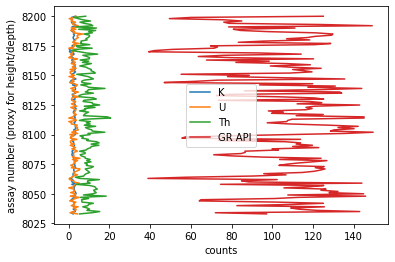

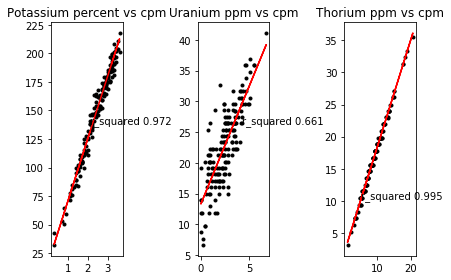

In [5]:
plt.plot(df.Kprc, df.id, label='K')
plt.plot(df.Uppm, df.id, label='U')
plt.plot(df.Thppm, df.id, label='Th')
plt.plot(df.GR, df.id, label='GR API')
#plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('counts')
plt.ylabel('assay number (proxy for height/depth)');

###########

fig = plt.figure()
ax1 = fig.add_subplot(131) # potassium
x1=df.Kprc
y1=df.Kcpm
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax1.plot(x1,y1,'k.', x1, line,'r-')
ax1.text(x1.iloc[0],y1.iloc[0],'r_squared '+str(round(r_value**2,3)))
ax1.set_title('Potassium percent vs cpm')

ax2 = fig.add_subplot(132) # uranium
x1=df.Uppm
y1=df.Ucpm 
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax2.plot(x1,y1,'k.', x1, line,'r-')
ax2.text(x1.iloc[0],y1.iloc[0],'r_squared '+str(round(r_value**2,3)))
ax2.set_title('Uranium ppm vs cpm')

ax3 = fig.add_subplot(133)
x1=df.Thppm
y1=df.Thcpm 
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
line = slope*x1+intercept
ax3.plot(x1,y1,'k.', x1, line,'r-')
ax3.text(x1.iloc[0],y1.iloc[0],'r_squared '+str(round(r_value**2,3)))
ax3.set_title('Thorium ppm vs cpm')

plt.tight_layout()

## Make a plot for putting next to a graphic log

In [6]:
t=df.groupby('Section')

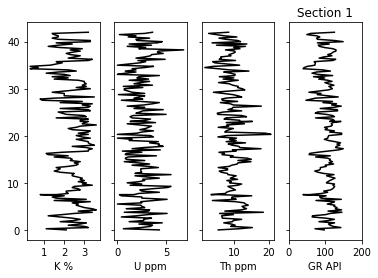

In [7]:
#plt.rcParams['svg.fonttype'] = 'none'

xlimGR=[0,200] # set gamma ray API unit xscale

for group,values in df.groupby('Section'):
    S=values
    
    fig, axes = plt.subplots(1, 4, sharey=True)
    #plt.ylim=[0,np.round(np.max(S.Height),-1)]
    plt.title('Section '+str(group))

    axes[0].plot(S.Kprc,S.Height,'k-')
    axes[0].set_xlabel('K %')

    axes[1].plot(S.Uppm,S.Height,'k-')
    axes[1].set_xlabel('U ppm')

    axes[2].plot(S.Thppm,S.Height,'k-')
    axes[2].set_xlabel('Th ppm')

    axes[3].plot(S.GR,S.Height,'k-')
    axes[3].set_xlabel('GR API')
    axes[3].set_xlim(xlimGR)
    
plt.savefig('Section_' + str(group) + ".svg", transparent=True) 

## Export to LAS (to be done later)

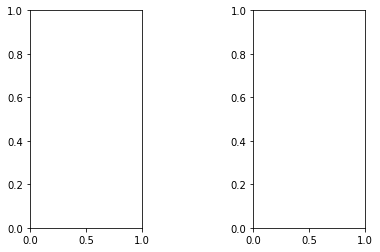

In [8]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
plt.subplots_adjust(wspace=1, hspace=1)

